<hr/>

# Intro to Data Science 

02/07/2020

**TA** - Dapeng Yao (dyao10@jhu.edu)   <br/>
**Office Hour** - Friday 12:30pm ~ 1:30pm Whitehead 212


<hr/>


In [1]:
%pylab inline 
from scipy.stats import norm as gaussian
from scipy.stats.kde import gaussian_kde
from scipy import stats
import statsmodels.api as sm
from statsmodels.distributions.mixture_rvs import mixture_rvs

Populating the interactive namespace from numpy and matplotlib


## <font color='blue'>Unhomework 1. Inverse transform sampling in R, prove $\displaystyle X = \mathrm{CDF}^{-1}(U_{01}) $</font>

### Assumption: 

suppose the CDF of $X$ is $F(x)$, $U$ is uniformly distributed on $(0,1)$. 
Then the CDF of $Y=F^{-1}(U)$ is also $F$.


### Proof:
*
    \begin{eqnarray}
        \mathbb{P}(Y\leq x) &=& \mathbb{P}(F^{-1}(U) \leq x) \\
                  &=& \mathbb{P}(U \leq F(x)) \;\;\; \text{ applying F to both side } \\
                  &=& F(x) \;\;\; \text { because } P(U\leq y)=y \text{ when U is uniform on (0,1)}
    \end{eqnarray}
    
### Procedure:
(1) Generate random number $U$ from the standard uniform distribution in the interval [0,1]

(2) Find the inverse of the desired CDF 

(3) Compute $X=F^{-1}(U)$, then random variable $X$ has distribution $F$

### Example:
Let the exponential distribution function be $F_{X}(x) = 1-e^{-\lambda x}$, $x\geq 0$

Find the inverse CDF of this function: $x = F^{-1}(y)= -\frac{1}{\lambda}\log(1-y)$

Generate $U$ from $\text{Unif}(0,1)$, then $X = F^{-1}(U) = -\frac{1}{\lambda}\log(1-U)$ has exponential distribution

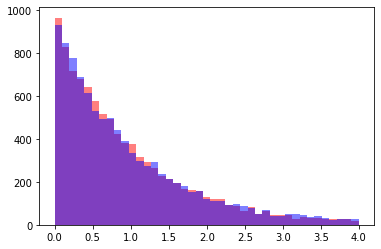

In [2]:
# ****** Here is the code for this example **********

# set the lamda value
par = 1

# generate a uniform distribution
U = numpy.random.uniform(0, 1, 10000)

# inverse CDF
X = -1/par*log(1-U) 

# Exponential distribution
Y = numpy.random.exponential(1, 10000)

# plot these two function
hist(X, 41, range=[0,4], color='r', alpha=0.5);
hist(Y, 41, range=[0,4], color='b', alpha=0.5);

## <font color='blue'>Unhomework 2. Sample from a mixture of two Gaussians using uniform random numbers in the [0,1) interval. Try different (μ1, σ1) and (μ2, σ2 ) values!</font>

Mixture of two Gaussians: $X \sim p\mathcal{N}(\mu_1, \sigma_1^2)+(1-p)\mathcal{N}(\mu_2, \sigma_2^2)$

In [4]:
# values of parameters
mu = [5,0] 
sigma = [2,1] 
p = 0.5

# uniform random numbers for inverse transform
U = np.random.rand(10000)

# standard Gaussian random numbers using inverse transform  ppf:inverse cdf
X = gaussian.ppf(U)

# uniform random numbers for choosing populations
V = np.random.rand(10000)

# if V <= p then X = mu[0]+sigma[0]*Z, where Z is standard Gaussian
X[V<=p] = mu[0] + sigma[0] * X[V<=p]
X[V>p] = mu[1] + sigma[1] * X[V>p]

## <font color='blue'>Unhomework 3. Build different density estimators and compare to the original PDF. Try histogramming and KDE with different parameters.</font>

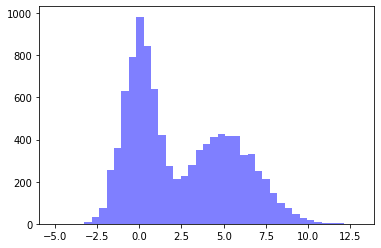

In [5]:
# the histogram of mixture of Gaussians
hist(X, 41, range=[-5,13], color='b', alpha=0.5);

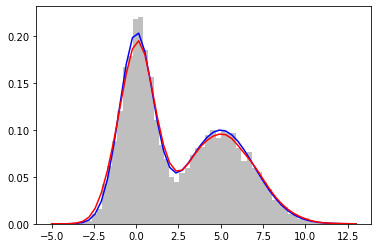

In [7]:
# the KDE of mixture of Gaussians
kde = gaussian_kde(X)
xx = np.linspace(-5,13)

# pdf of mixture of gaussians
pdf = p*gaussian(mu[0],sigma[0]).pdf(xx) + (1-p)*gaussian(mu[1],sigma[1]).pdf(xx)

# plot
plt.plot(xx, pdf, 'b'); 
plt.plot(xx, kde(xx), 'r'); 
plt.hist(X, density=1, bins=50, color='grey', alpha=0.5); 

## <font color='blue'>Extra Exercise for kernel density estimation.</font>

Since the histogram is discontinuous, we can use kernel density estimation to compute a continuous probability density function. In this case, after setting the values and set of the mixture distribution, we initialize a univariate kernel density estimator using KDEUnivariate. In this example, a Gaussian kernel was used.

In [8]:
# random seed
np.random.seed(12345)

# set the values
mu1, sigma1, p1 = -1 , .5, .25
mu2, sigma2, p2 = 1 , .5, .75

# Sample from a mixture of distributions
mixture = mixture_rvs(prob=[p1, p2], size=250, 
                       dist=[stats.norm, stats.norm],
                       kwargs = (dict(loc=mu1, scale=sigma1),
                                 dict(loc=mu2, scale=sigma2)))

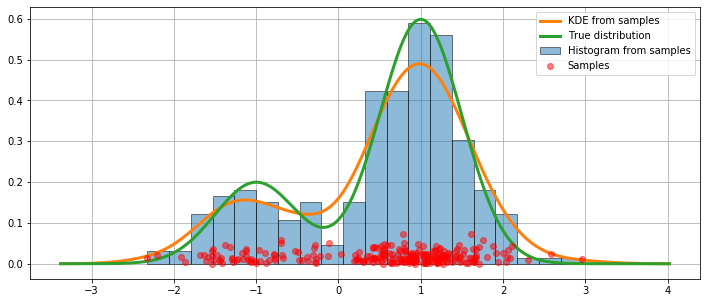

In [9]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

kde = sm.nonparametric.KDEUnivariate(mixture)
# Estimate the densities
kde.fit()

# Plot the histrogram
ax.hist(mixture, bins=20, density=True, label='Histogram from samples', zorder=5, edgecolor='k', alpha=0.5)

# Plot the KDE as fitted using the default arguments
ax.plot(kde.support, kde.density, lw=3, label='KDE from samples', zorder=10)

# Plot the true distribution
true_values = (stats.norm.pdf(loc=mu1, scale=sigma1, x=kde.support)*p1
             + stats.norm.pdf(loc=mu2, scale=sigma2, x=kde.support)*p2)
ax.plot(kde.support, true_values, lw=3, label='True distribution', zorder=15)

# Plot the samples
ax.scatter(mixture, np.abs(np.random.randn(mixture.size))/40,
           marker='o', color='red', zorder=20, label='Samples', alpha=0.5)

ax.legend(loc='best')
ax.grid(True, zorder=-5)

https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/